In [1]:
## R code 9.1
p <- list()
p$A <- c(0,0,10,0,0)
p$B <- c(0,1,8,1,0)
p$C <- c(0,2,6,2,0)
p$D <- c(1,2,4,2,1)
p$E <- c(2,2,2,2,2)

In [2]:
## R code 9.2
p_norm <- lapply( p , function(q) q/sum(q))

In [3]:
## R code 9.3
( H <- sapply( p_norm , function(q) -sum(ifelse(q==0,0,q*log(q))) ) )

A         B         C         D         E 
0.0000000 0.6390319 0.9502705 1.4708085 1.6094379

In [4]:
## R code 9.4
ways <- c(1,90,1260,37800,113400)
logwayspp <- log(ways)/10

In [5]:
## R code 9.5
# build list of the candidate distributions
p <- list()
p[[1]] <- c(1/4,1/4,1/4,1/4)
p[[2]] <- c(2/6,1/6,1/6,2/6)
p[[3]] <- c(1/6,2/6,2/6,1/6)
p[[4]] <- c(1/8,4/8,2/8,1/8)

In [6]:
# compute expected value of each
sapply( p , function(p) sum(p*c(0,1,1,2)) )

[1] 1 1 1 1

In [7]:
## R code 9.6
# compute entropy of each distribution
sapply( p , function(p) -sum( p*log(p) ) )

[1] 1.386294 1.329661 1.329661 1.213008

In [8]:
## R code 9.7
p <- 0.7
( A <- c( (1-p)^2 , p*(1-p) , (1-p)*p , p^2 ) )

[1] 0.09 0.21 0.21 0.49

In [9]:
## R code 9.8
-sum( A*log(A) )

## R code 9.9
sim.p <- function(G=1.4) {
    x123 <- runif(3)
    x4 <- ( (G)*sum(x123)-x123[2]-x123[3] )/(2-G)
    z <- sum( c(x123,x4) )
    p <- c( x123 , x4 )/z
    list( H=-sum( p*log(p) ) , p=p )
}

[1] 1.221729

Loading required package: rstan
Loading required package: ggplot2
rstan (Version 2.9.0, packaged: 2016-01-05 16:17:47 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.58)


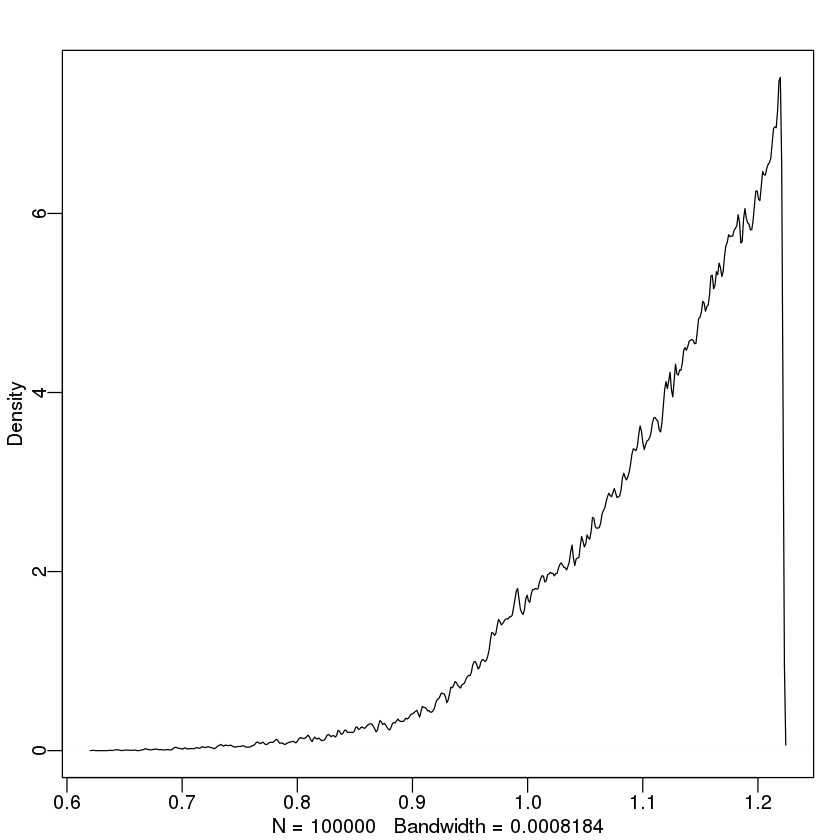

In [11]:
## R code 9.10
library('rethinking')
H <- replicate( 1e5 , sim.p(1.4) )
dens( as.numeric(H[1,]) , adj=0.1 )

In [12]:
## R code 9.11
entropies <- as.numeric(H[1,])
distributions <- H[2,]

In [13]:
## R code 9.12
max(entropies)

[1] 1.221729

In [14]:
## R code 9.13
distributions[ which.max(entropies) ]

[[1]]
[1] 0.0900835 0.2098539 0.2099791 0.4900835